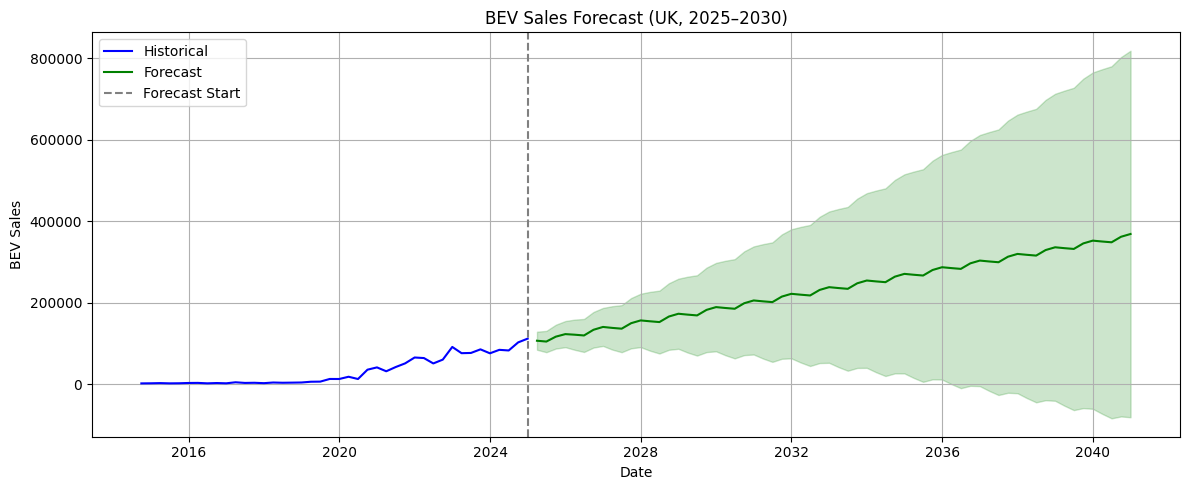

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('BEV_dataset.csv') 

df['Quarter'] = pd.PeriodIndex(df['Quarter'], freq='Q').to_timestamp('Q')
df = df.sort_values('Quarter').reset_index(drop=True)
df.set_index('Quarter', inplace=True)


# Fitting SARIMA
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)

model = SARIMAX(df['BEV_Sales'], order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

n_periods = 64
future_dates = pd.date_range(start=df.index[-1] + pd.offsets.QuarterEnd(),
                             periods=n_periods, freq='Q')
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_df = pd.DataFrame({
    'Forecast': forecast_values,
    'Lower': conf_int.iloc[:, 0],
    'Upper': conf_int.iloc[:, 1]
}, index=future_dates)

plt.figure(figsize=(12, 5))
plt.plot(df.index, df['BEV_Sales'], label='Historical', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='green')
plt.fill_between(forecast_df.index, forecast_df['Lower'], forecast_df['Upper'],
                 color='green', alpha=0.2)
plt.axvline(x=df.index[-1], linestyle='--', color='gray', label='Forecast Start')
plt.title('BEV Sales Forecast (UK, 2025–2030)')
plt.xlabel('Date')
plt.ylabel('BEV Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


*extracting the forecasts*

In [2]:
forecast_2030 = forecast_df[forecast_df.index.year == 2030]

forecast_2035 = forecast_df[forecast_df.index.year == 2035]

forecast_2040 = forecast_df[forecast_df.index.year == 2040]

print("Forecasted BEV Sales in 2030:")
print(forecast_2030)

print("\nForecasted BEV Sales in 2035:")
print(forecast_2035)

print("\nForecasted BEV Sales in 2040:")
print(forecast_2040)


Forecasted BEV Sales in 2030:
                 Forecast         Lower          Upper
2030-03-31  187020.002651  71165.996314  302874.008987
2030-06-30  185114.006798  63351.995611  306876.017986
2030-09-30  198702.719202  71387.566051  326017.872353
2030-12-31  205494.603215  72865.270693  338123.935738

Forecasted BEV Sales in 2035:
                 Forecast         Lower          Upper
2035-03-31  268577.351991  15451.247435  521703.456547
2035-06-30  266671.252361   5800.688108  527541.816614
2035-09-30  280258.622044  11932.026504  548585.217584
2035-12-31  287049.997849  11474.455048  562625.540650

Forecasted BEV Sales in 2040:
                 Forecast         Lower          Upper
2040-03-31  350133.641539 -72658.113147  772925.396225
2040-06-30  348227.541999 -83771.518049  780226.602047
2040-09-30  361814.912851 -79143.566941  802773.392642
2040-12-31  368606.289098 -81128.477508  818341.055705
